In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy import constants as c
from astropy import units as u
import sys, os, glob
from astropy.io import fits
from matplotlib.patches import Ellipse

In [8]:
d = lambda x, y: 1e-1
a = lambda x, y: 1e-2 + 1e-2j
c = lambda x, y: 1e-2 + 1e-2j
s = lambda x, y: 1e-2

In [9]:
def Q(x, y):
    return 4 * (d(x, y) + 4/3 * s(x, y)) * a(x, y) + 1/3 * c(x, y)**2
def S(x, y):
    return 2 * (d(x, y) + 4/3 * s(x, y)) ** 2 \
            + 2 * np.abs(a(x, y))**2 + 2/3 * np.abs(c(x, y))**2 + 4/9 * np.abs(s(x, y))**2

In [10]:
Q(0, 0), S(0, 0)

((0.004533333333333334+0.0046j), 0.02626666666666667)

In [11]:
def gamma(x, y):
    return Q(x, y) / S(x, y)

In [12]:
gamma(0, 0)

(0.17258883248730963+0.17512690355329946j)

0.16206994374857625 0.14111952668636168 0.49175740949170976 0.7926973038411455 45.418209941497096


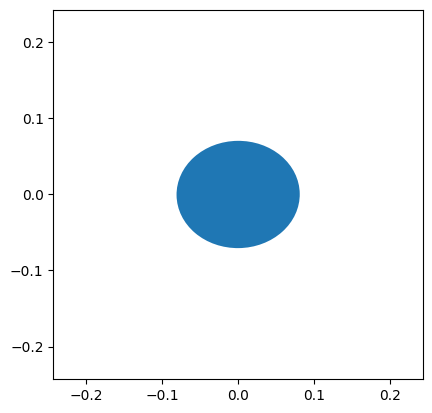

In [22]:
e = np.abs(gamma(0, 0)*2)
phi = np.angle(gamma(0, 0)*2)
a_ep = np.sqrt(S(0, 0))
b_ep = a_ep * np.sqrt(1 - e**2)
print(a_ep, b_ep, e, phi, np.degrees(phi))

fig, ax = plt.subplots()
ellipse = Ellipse(xy=(0, 0), width=a_ep, height=b_ep, angle=phi)
ax.add_patch(ellipse)
ax.set_aspect('equal')
plt.xlim([-1.5*a_ep, 1.5*a_ep])
plt.ylim([-1.5*a_ep, 1.5*a_ep])
plt.show()

In [23]:
def getLineParameters(xpos, ypos, gamma):
    length, angle = np.abs(gamma), np.angle(gamma)
    return [xpos - np.cos(angle)*length/2, xpos + np.cos(angle)*length/2], \
            [ypos - np.sin(angle)*length/2, ypos + np.sin(angle)*length/2]

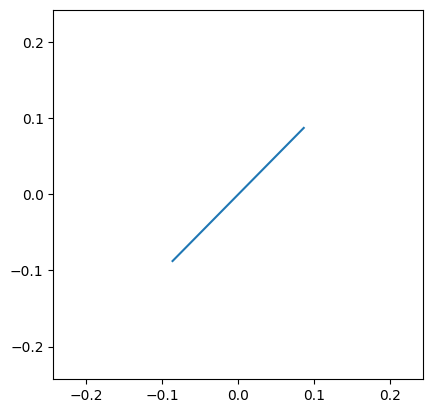

In [24]:
fig, ax = plt.subplots()
plt.plot(*getLineParameters(0, 0, gamma(0,0)))
ax.set_aspect('equal')
plt.xlim([-1.5*a_ep, 1.5*a_ep])
plt.ylim([-1.5*a_ep, 1.5*a_ep])
plt.show()

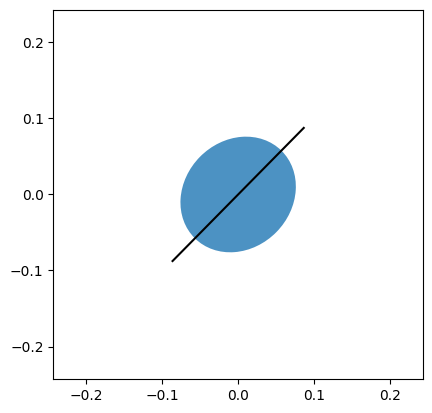

In [36]:
fig, ax = plt.subplots()
ellipse = Ellipse(xy=(0, 0), width=a_ep, height=b_ep, angle=np.degrees(phi), alpha=0.8)
ax.add_patch(ellipse)
plt.plot(*getLineParameters(0, 0, gamma(0,0)), color = "black")
ax.set_aspect('equal')
plt.xlim([-1.5*a_ep, 1.5*a_ep])
plt.ylim([-1.5*a_ep, 1.5*a_ep])
plt.show()